In [4]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
#LOAD AND PREPARE DATASET

data = pd.read_csv('/content/breast-cancer.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
print(data.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
# Encode 'diagnosis': M = 1 (Malignant), B = 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Drop unnecessary columns
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

In [10]:
#SCALE AND SPLIT DATA

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [11]:
# Train SVM (Linear & RBF)

# Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)


In [12]:
#EVALUATE PERFORMANCE

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

print("\nRBF SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.9766081871345029
RBF SVM Accuracy: 0.9707602339181286

RBF SVM Confusion Matrix:
[[105   3]
 [  2  61]]

Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [13]:
#HYPERPARAMETER TUNING

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluate tuned model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Test Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 10, 'gamma': 0.01}
Best CV Score: 0.9672784810126581
Tuned Test Accuracy: 0.9883040935672515


In [14]:
#CROSS - VALIDATION

final_model = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
scores = cross_val_score(final_model, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV accuracy: 0.9789318428815401


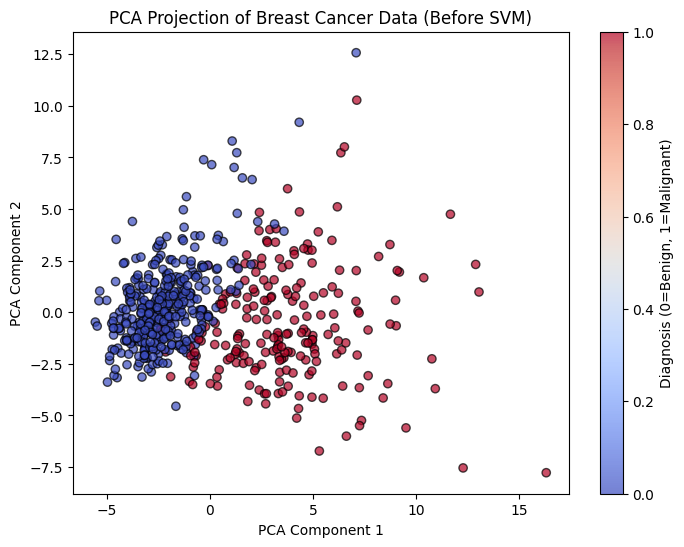

In [17]:
# PCA Plot Before SVM (Just for Visual Insight)


from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Breast Cancer Data (Before SVM)')
plt.colorbar(label='Diagnosis (0=Benign, 1=Malignant)')
plt.show()


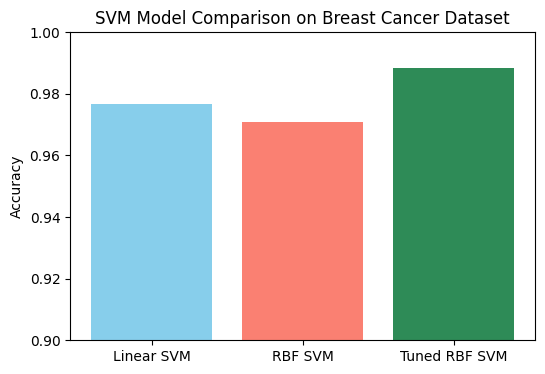

In [16]:
#Compare SVM Linear vs RBF Accuracy in a Bar Chart


# Collect accuracy scores
linear_acc = accuracy_score(y_test, y_pred_linear)
rbf_acc = accuracy_score(y_test, y_pred_rbf)
tuned_acc = accuracy_score(y_test, y_pred_best)

# Plot
plt.figure(figsize=(6,4))
plt.bar(['Linear SVM', 'RBF SVM', 'Tuned RBF SVM'], [linear_acc, rbf_acc, tuned_acc], color=['skyblue', 'salmon', 'seagreen'])
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.title('SVM Model Comparison on Breast Cancer Dataset')
plt.show()
